# Fraud Data set

### Predict if a particular transaction instance is fraud or not¶

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fraud_data = pd.read_csv('fraud_dataset.csv')

fraud_data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
fraud_data.shape

(6362620, 11)

In [5]:
fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
fraud_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
fraud_data.drop_duplicates()

fraud_data.shape

(6362620, 11)

In [9]:
fraud_data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
fraud_data.isFraud.unique()

array([0, 1], dtype=int64)

## Exploratory Data Analysis

In [11]:
fraud_data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [12]:
fraud_data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [13]:
unique = fraud_data.apply(pd.Series.unique)

unique

step              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
type                  [PAYMENT, TRANSFER, CASH_OUT, DEBIT, CASH_IN]
amount            [9839.64, 1864.28, 181.0, 11668.14, 7817.71, 7...
nameOrig          [C1231006815, C1666544295, C1305486145, C84008...
oldbalanceOrg     [170136.0, 21249.0, 181.0, 41554.0, 53860.0, 1...
newbalanceOrig    [160296.36, 19384.72, 0.0, 29885.86, 46042.29,...
nameDest          [M1979787155, M2044282225, C553264065, C389970...
oldbalanceDest    [0.0, 21182.0, 41898.0, 10845.0, 5083.0, 22425...
newbalanceDest    [0.0, 40348.79, 157982.12, 51513.44, 16896.7, ...
isFraud                                                      [0, 1]
isFlaggedFraud                                               [0, 1]
dtype: object

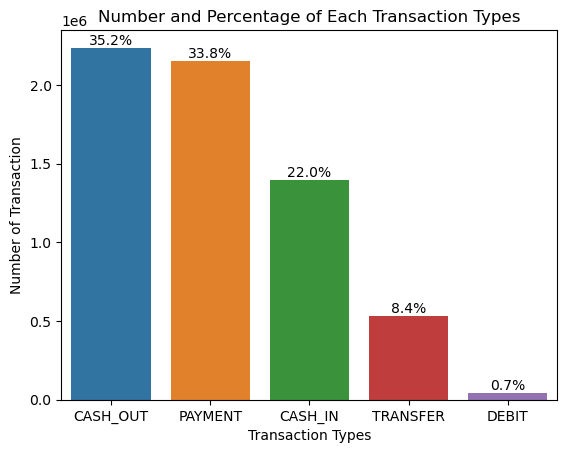

In [14]:
total = fraud_data.shape[0]
fraud_type = sns.countplot(x=fraud_data.type, order=fraud_data.type.value_counts().index)

for type in fraud_type.patches:
    percentage = '{:.1f}%'.format(100 * type.get_height() / total)
    x = type.get_x() + type.get_width() / 2
    y = type.get_height()
    
    fraud_type.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')
    
plt.title("Number and Percentage of Each Transaction Types")
plt.xlabel('Transaction Types')
plt.ylabel('Number of Transaction')

plt.show()

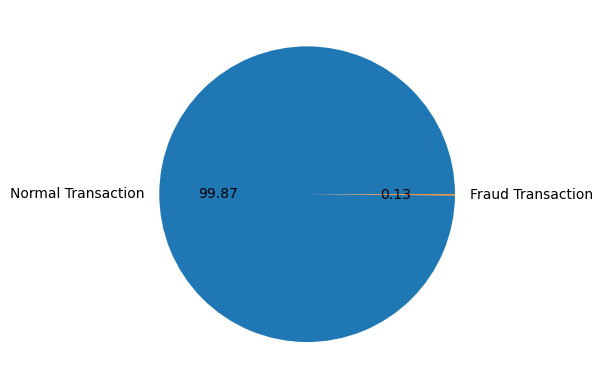

In [15]:
plt.pie(fraud_data['isFraud'].value_counts(), labels=['Normal Transaction', 'Fraud Transaction'], autopct='%0.2f')

plt.show()

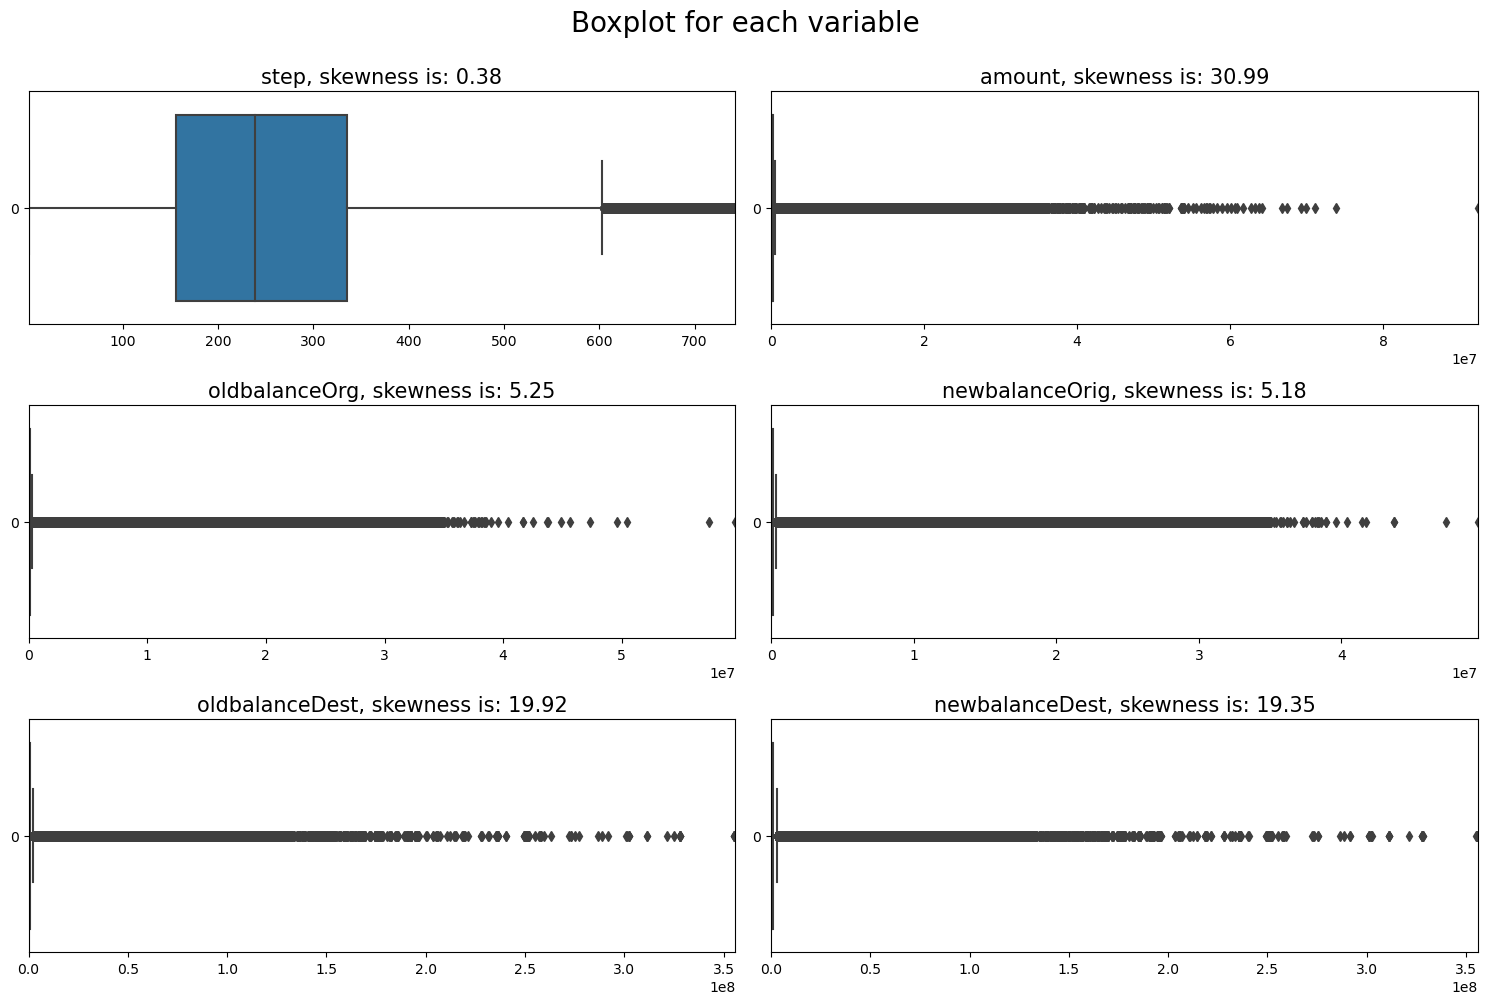

In [16]:
num_col = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

def fraud_data_boxplot(data,column):
    fig, ax = plt.subplots(3,2,figsize=(15,10))
    fig.suptitle('Boxplot for each variable', y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=15)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
        
fraud_data_boxplot(data=fraud_data, column=num_col)
plt.tight_layout()

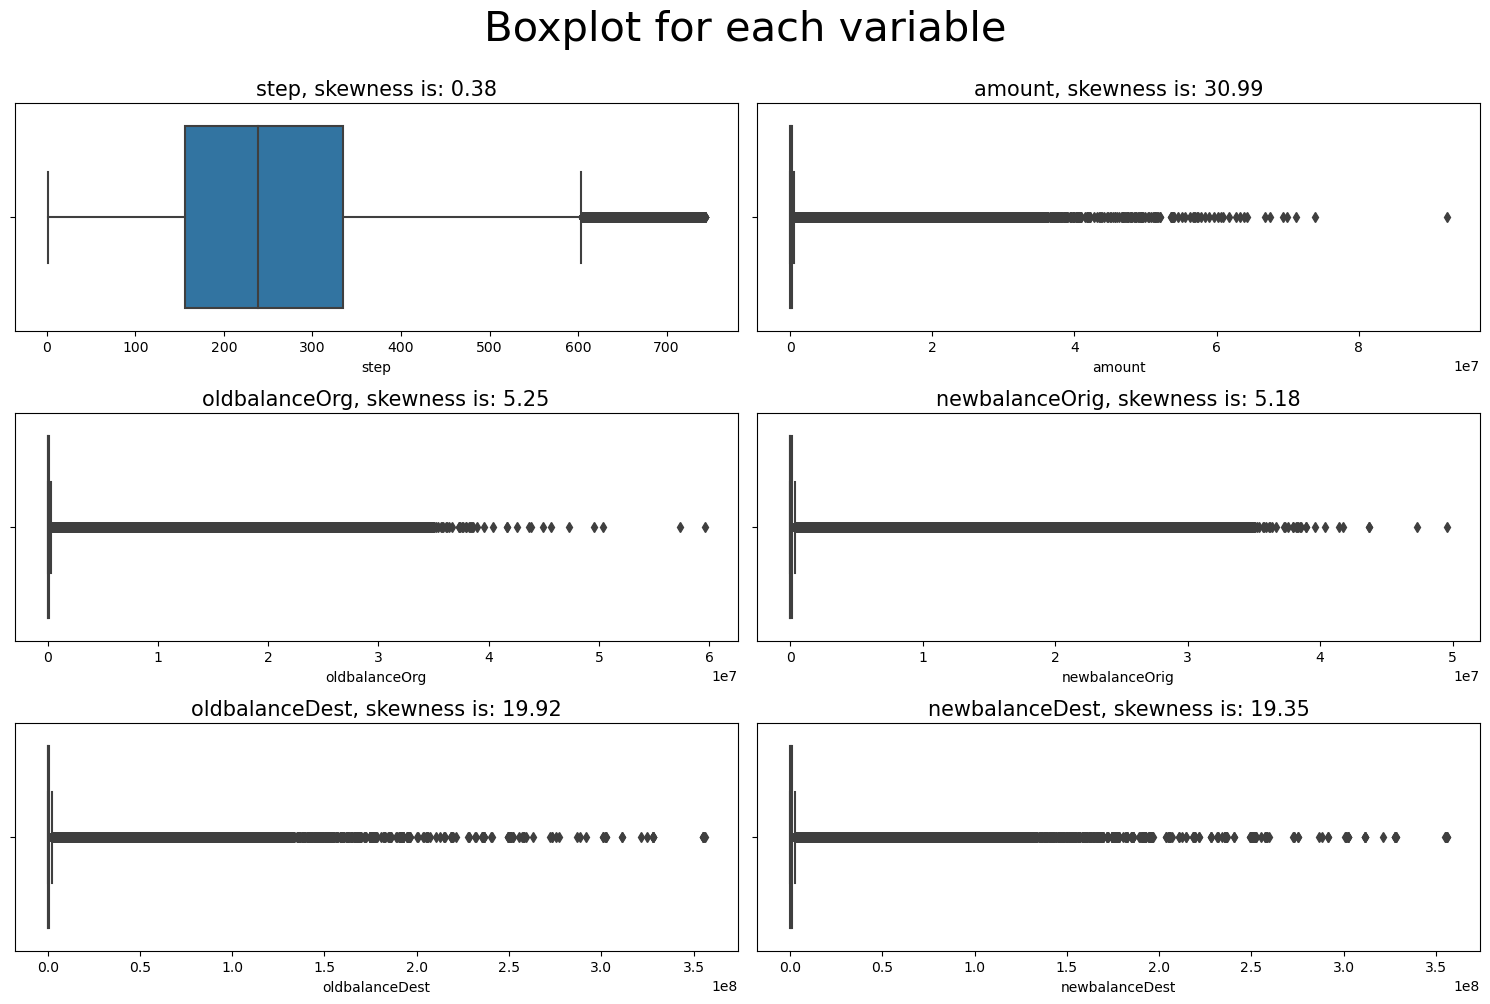

In [17]:
num_col = fraud_data[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]

fig, axes = plt.subplots(3, 2, figsize=(15, 10))

axes = axes.flatten()

fig.suptitle('Boxplot for each variable', y=1, size=30)

for i, column in enumerate(num_col.columns):
    sns.boxplot(data=num_col, x=column, ax=axes[i])
    axes[i].set_title(column+ ', skewness is: '+str(round(num_col[column].skew(axis = 0),2)),fontsize=15)

plt.tight_layout()
plt.show()

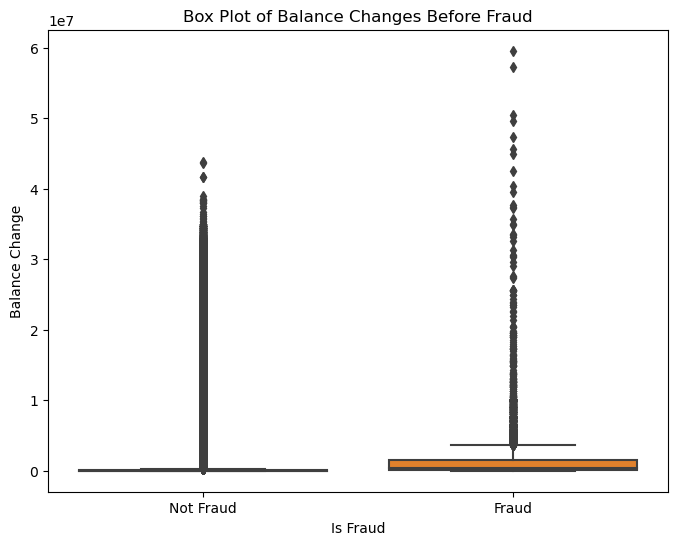

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=fraud_data)
plt.title('Box Plot of Balance Changes Before Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Balance Change')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

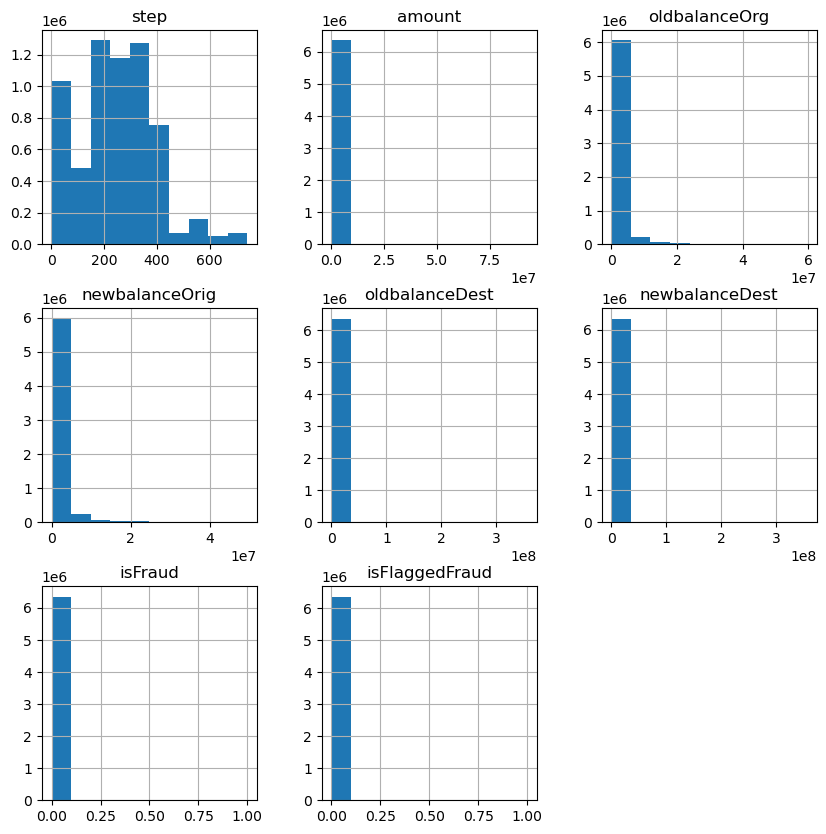

In [19]:
fraud_data.hist(figsize = (10,10))
plt.show()

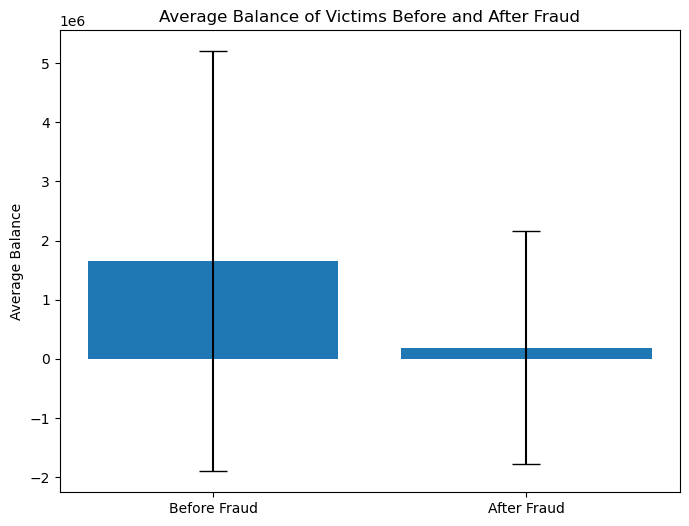

In [20]:
# Calculate average balances before and after fraud
avg_org_bal = fraud_data[fraud_data['isFraud'] == 1]['oldbalanceOrg'].mean()
avg_new_bal = fraud_data[fraud_data['isFraud'] == 1]['newbalanceOrig'].mean()

# Calculate standard deviations for error bars
std_org_bal = fraud_data[fraud_data['isFraud'] == 1]['oldbalanceOrg'].std()
std_new_bal = fraud_data[fraud_data['isFraud'] == 1]['newbalanceOrig'].std()

# Create a bar plot with error bars
plt.figure(figsize=(8, 6))
plt.bar(['Before Fraud', 'After Fraud'], [avg_org_bal, avg_new_bal], yerr=[std_org_bal, std_new_bal], capsize=10)
plt.title('Average Balance of Victims Before and After Fraud')
plt.ylabel('Average Balance')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_13524\2832840825.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fraud_data.corr(), annot=True)


<Axes: >

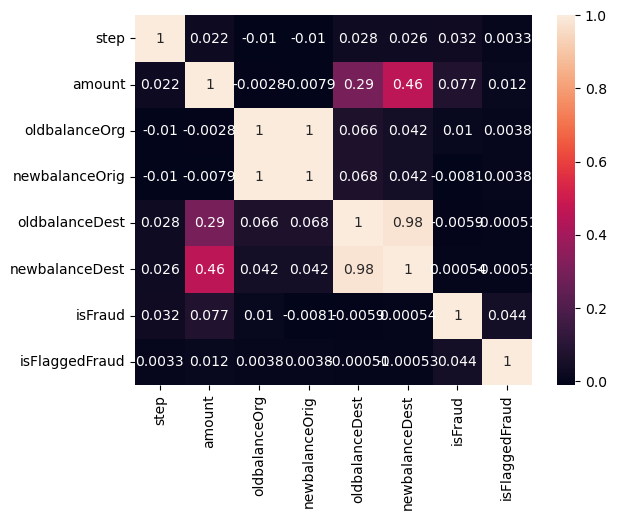

In [21]:
sns.heatmap(fraud_data.corr(), annot=True)